<a href="https://colab.research.google.com/github/surajsarkar/deepLearning/blob/main/notebooks/08_introduction_to_nlp_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to NLP fundamentals in Tensorflow

## Check for GPU

In [ ]:
# Check Which GPU are we using currently
!nvidia-smi -L

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



## Get helper funcitons

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-07-14 11:10:27--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-07-14 11:10:27 (57.7 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import unzip_data, plot_loss_curves, compare_historys, create_tensorboard_callback

## Get the data

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

--2022-07-14 11:10:36--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.203.128, 172.253.123.128, 142.250.98.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.01s   

2022-07-14 11:10:36 (41.7 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [ ]:
unzip_data("nlp_getting_started.zip")

## Become one with the data
Visualise the texts from the dataset

In [ ]:
import pandas as pd
train_df = pd.read_csv("train.csv")

test_df = pd.read_csv("test.csv")

In [ ]:
train_df[train_df.target == 0].head()

,id,keyword,location,text,target
15,23,NaN,NaN,What's up man?,0
16,24,NaN,NaN,I love fruits,0
17,25,NaN,NaN,Summer is lovely,0
18,26,NaN,NaN,My car is so fast,0
19,28,NaN,NaN,What a goooooooaaaaaal!!!!!!,0


In [ ]:
# Shuffle the data in dataframe
train_df_shuffled = train_df.sample(frac=1, random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [ ]:
 # What does a test dataframe looks like 
 test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
train_df["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
# How many train and test data are there?
len(train_df), len(test_df)

(7613, 3263)

In [ ]:
# Visualise some random data from the dataset
import random
random_index = random.randint(0, len(train_df)-5)
for row in train_df_shuffled[["text", "target"]][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"{text}\n")
  print(f"Target: {'Desaster' if row[2] == 1 else 'Not a desaster'}\n")
  print("-------\n")

The #IranDeal only covers nuclear activity. What are they doing about Bioterrorism? Iran has broken at least 27 other agreements.

Target: Desaster

-------

Apparently if you're bleeding people look at you weird lol well it's fine keep walking

Target: Not a desaster

-------

RT: ZONEWolf123: I liked a YouTube video http://t.co/u66kYg11ZD Minecraft: NIGHT LUCKY BLOCK MOD (BOB APOCALYPSE WITHER 2.0 &amp; MORE!) MoÛ_

Target: Not a desaster

-------

The universe might not actually exist scientists say http://t.co/DEfJ7XeKgX 'The #SUN blew up and the #Earth began'...

Target: Not a desaster

-------

POV footage captures violent landing from inside plane during storm http://t.co/kxewlHH7Uw

Target: Desaster

-------



## Split data into tarining and validation set

In [ ]:
from sklearn.model_selection import train_test_split
X, y = train_df_shuffled["text"].to_numpy(), train_df_shuffled["target"].to_numpy()
train_sentences, val_sentences, train_labels, val_labels = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
#Check the lengts of the splits
len(train_sentences), len(val_sentences)

(6851, 762)

In [ ]:
len(train_df)

7613

In [ ]:
# Check the first 10 sentences
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object), array([0, 

## Converting text into numbers

### Text vactorization (tokenization)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [ ]:
# Use the default text vectorization
text_vectorizer = TextVectorization(
    max_tokens=None, # number of most common words that will be tokenize, word that are not tokenized are represented as <OOV>, if None it finds out the num on it's own.
    standardize="lower_and_strip_punctuation",
    split="whitespace", # Defines how to split the word, in this case whitespace 
    ngrams=None, # num of word that will be used as 1 ngrams, if none 1 word = 1 ngrams, creates group of n-words
    output_mode="int",
    output_sequence_length=None, # how long you want your sequence to be, if none length of the maximum sequence is taken.
    # pad_to_max_tokens=True, # if True, the sequence is padded with 0 to match the sequence length, invalid if you are using mx_tokens=None
)

In [ ]:
# Find the average number of tokens (words) in the training tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [ ]:
# Setup text vactorization variables
max_vocab_length = 10000
max_length = 15

text_vectorizer = TextVectorization(
    max_tokens=max_vocab_length,
    standardize="lower_and_strip_punctuation",
    split="whitespace",
    ngrams=None,
    output_mode="int",
    output_sequence_length=max_length
    )

In [ ]:
text_vectorizer.adapt(train_sentences)

In [ ]:
sample = "I have a work to do tonight"
text_vectorizer([sample])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  8,  24,   3, 166,   5,  68, 383,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [ ]:
# Choose a random sentence from training set and vectorize it
random_sentence = random.choice(train_sentences)
print(f"Orignal sentence:\n {random_sentence} \n\nVectorized sentence:\n{text_vectorizer(random_sentence)}")

Orignal sentence:
 ...//..// whao.. 12000 Nigerian refugees repatriated from Cameroon http://t.co/baE0Ap4G9Y 

Vectorized sentence:
[2607 1099 1003  313 1373   20 1222    1    0    0    0    0    0    0
    0]


In [ ]:
# Get the unique words in vocablary
words_in_vocab = text_vectorizer.get_vocabulary() # get all the common words in the vocabulary
top_5_words = words_in_vocab[:5]
bottom_5_words = words_in_vocab[-5:]

In [ ]:
top_5_words, bottom_5_words

(['', '[UNK]', 'the', 'a', 'in'],
 ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1'])

### Creating Embadding with Embadding layer

In [ ]:
from tensorflow.keras import layers
embedding = layers.Embedding(
    input_dim = max_vocab_length, # set the input shape
    output_dim = 128, # set the output shape
    input_length=max_length, # how long each input will be
)

embedding

## Modelling a text dataset (running series of experiment)

* Create a model
* Compile a model 
* Fit a model 
* Evaluate a model 


### Model 0: Getting a baseline

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

# 1. Create tokenization and model a pipeline
model_0 = Pipeline([
  ("tfidf", TfidfVectorizer()), # vectorize the text
  ("clf", MultinomialNB()) # model the text
])

# # 2. Fit the pipeline model to the training data 
model_0.fit(train_sentences, train_labels)



Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
# Evaluate the model
baseline_score = model_0.score(val_sentences, val_labels)
baseline_score

0.7926509186351706

In [ ]:
# Evaluating the model in train_set
model_0.score(train_sentences, train_labels)

0.887169756239965

In [ ]:
# Make prediction 
val_prediction = model_0.predict(val_sentences)
val_prediction[:10] == val_labels[:10]

array([False, False,  True, False, False,  True,  True,  True,  True,
        True])

In [ ]:
# Make prediction on test_df
prediction = model_0.predict(test_df)
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
prediction[:5]

array([0, 0, 1, 0])

### Creating Evaluation function for our model function.

In [ ]:
# Create a fun to get all the evaluation metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import sklearn as sk

def calculate_results(y_true, y_pred):
  """
  Takes in model, data and label and returns dictonary of all the evaluations

  Args:
    model: model to evalueate
    X: Data to evaluate with
    y: true_labels
  
  Returns:
    Dict: dictonary of accuary, f1_score, precision_score, recall_score
  """
  accuracy = accuracy_score(y_true, y_pred)
  f1_score = sk.metrics.f1_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred)
  recall = recall_score(y_true, y_pred)
  # return the dict
  return {"accuracy": accuracy, "f1_score": f1_score, "precision": precision, "recall": recall}

In [ ]:
baseline_result = calculate_results(y_true=val_labels, y_pred=val_prediction)

### Model 1: A simple dense model

In [ ]:
# Get the helper function
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-07-14 11:10:40--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-07-14 11:10:40 (50.4 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [ ]:
# Create a tensorflow callback
from helper_functions import create_tensorboard_callback

# Create a directory to save TensorBoard logs
SAVE_DIR = "model_logs"

In [ ]:
# # Build model with function API
# from tensorflow.keras import layers

# inputs = layers.Input(shape=(1, ), dtype=tf.string)
# x = text_vectorizer(inputs) # Convert tweets to tokens
# x = embedding(x) # converting tokenized text into vector
# x = layers.GlobalAveragePooling1D(name="pooling_layer")(x)
# outputs = layers.Dense(1, activation="sigmoid", name="output_layer")(x)
# model_1 = tf.keras.Model(inputs, outputs)

In [ ]:
# Build model with the Functional API
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string") # inputs are 1-dimensional strings
x = text_vectorizer(inputs) # turn the input text into numbers
x = embedding(x) # create an embedding of the numerized numbers
x = layers.GlobalAveragePooling1D()(x) # lower the dimensionality of the embedding (try running the model without this layer and see what happens)
outputs = layers.Dense(1, activation="sigmoid")(x) # create the output layer, want binary outputs so use sigmoid activation
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense") # construct the model

In [ ]:
# Compile model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [ ]:
# Compile the model 
# model_1.compile(
#     loss="binary_crossentropy",
#     optimizer=tf.keras.optimizers.Adam(),
#     metrics=["accuary"]
# )

In [ ]:
# # Fit the model 
# model_1_history = model_1.fit(x=train_sentences, 
#                               y=train_labels,
#                               epochs=5,
#                               validation_data=(val_sentences, val_labels),
#                               callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR, experiment_name="model_1_dense")]
#                               )

In [ ]:
# Fit the model
model_1_history = model_1.fit(train_sentences, # input sentences can be a list of strings due to text preprocessing layer built-in model
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR, 
                                                                     experiment_name="simple_dense_model")])

Saving TensorBoard log files to: model_logs/simple_dense_model/20220714-111041
Epoch 1/5
215/215 [==============================] - 9s 31ms/step - loss: 0.6094 - accuracy: 0.6995 - val_loss: 0.5356 - val_accuracy: 0.7585
Epoch 2/5
215/215 [==============================] - 6s 27ms/step - loss: 0.4404 - accuracy: 0.8189 - val_loss: 0.4675 - val_accuracy: 0.7835
Epoch 3/5
215/215 [==============================] - 4s 18ms/step - loss: 0.3464 - accuracy: 0.8612 - val_loss: 0.4624 - val_accuracy: 0.7913
Epoch 4/5
215/215 [==============================] - 4s 18ms/step - loss: 0.2835 - accuracy: 0.8914 - val_loss: 0.4644 - val_accuracy: 0.7835
Epoch 5/5
215/215 [==============================] - 4s 18ms/step - loss: 0.2374 - accuracy: 0.9140 - val_loss: 0.4821 - val_accuracy: 0.7874


In [ ]:
train_sentences.shape, train_labels.shape

((6851,), (6851,))

In [ ]:
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 3ms/step - loss: 0.4821 - accuracy: 0.7874


[0.4820912778377533, 0.787401556968689]

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [ ]:
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs[0]

array([0.2969622], dtype=float32)

In [ ]:
model_1_pred_probs.shape

(762, 1)

In [ ]:
# Look at the first 10 predictions 
model_1_pred_probs[:10]

array([[0.2969622 ],
       [0.76452136],
       [0.9968839 ],
       [0.1243408 ],
       [0.13886395],
       [0.9378904 ],
       [0.9035131 ],
       [0.99317884],
       [0.9546039 ],
       [0.2744063 ]], dtype=float32)

In [ ]:
# Convert model prediction probablities to label format
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
val_labels[:10] == model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=bool, numpy=
array([ True, False,  True, False, False,  True,  True,  True,  True,
        True])>

In [ ]:
model_1_results = calculate_results(y_true=val_labels, y_pred=model_1_preds)
model_1_results

{'accuracy': 0.7874015748031497,
 'f1_score': 0.7412140575079872,
 'precision': 0.8345323741007195,
 'recall': 0.6666666666666666}

In [ ]:
baseline_result = calculate_results(y_true=val_labels, y_pred=val_prediction)
baseline_result

{'accuracy': 0.7926509186351706,
 'f1_score': 0.734006734006734,
 'precision': 0.8861788617886179,
 'recall': 0.6264367816091954}

> Looks like our baseline(model_0) is outperforming model_1, this signifies not all experiment meant to have improvemnt in result

## Visualizing learned embeddings

In [ ]:
# Get the vocabluary from the text vectorization layer
words_in_vocab = text_vectorizer.get_vocabulary()


In [ ]:
len(words_in_vocab), words_in_vocab[:20]

(10000,
 ['',
  '[UNK]',
  'the',
  'a',
  'in',
  'to',
  'of',
  'and',
  'i',
  'is',
  'for',
  'on',
  'you',
  'my',
  'with',
  'it',
  'that',
  'at',
  'by',
  'this'])

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [ ]:
embed_weights = model_1.get_layer("embedding").get_weights()[0]
embed_weights.shape

(10000, 128)

In [ ]:
# # Code below is adapted from: https://www.tensorflow.org/tutorials/text/word_embeddings#retrieve_the_trained_word_embeddings_and_save_them_to_disk
# import io

# # Create output writers
# out_v = io.open("embedding_vectors.tsv", "w", encoding="utf-8")
# out_m = io.open("embedding_metadata.tsv", "w", encoding="utf-8")

# # Write embedding vectors and words to file
# for num, word in enumerate(words_in_vocab):
#   if num == 0: 
#      continue # skip padding token
#   vec = embed_weights[num]
#   out_m.write(word + "\n") # write words to file
#   out_v.write("\t".join([str(x) for x in vec]) + "\n") # write corresponding word vector to file
# out_v.close()
# out_m.close()

# # # Download files locally to upload to Embedding Projector
# try:
#   from google.colab import files
# except ImportError:
#   pass
# else:
#   files.download("embedding_vectors.tsv")
#   files.download("embedding_metadata.tsv")

## Make a RNN model with LSTM layer

In [ ]:
from tensorflow.keras import layers
tf.random.set_seed(42)

model_2_embedding = layers.Embedding(
    input_dim=max_vocab_length,
    output_dim=128,
    embeddings_initializer="uniform",
    input_length=max_length,
    name="model_2_embedding"
)

# 1. Create a model
#Input layer
inputs = layers.Input(shape=(1,), dtype="string")
#tokenize the text
x = text_vectorizer(inputs)
# #Embedding layer
x = model_2_embedding(x)
# # lstm layer
x = layers.LSTM(64)(x)
# # Output layer
outputs = layers.Dense(1, name="output_layer", activation="sigmoid")(x)
# # Create a model 
model_2 = tf.keras.Model(inputs, outputs)

In [ ]:
# Compile a model_2
model_2.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

In [ ]:
# Fit the model 
model_2.fit(train_sentences,
            train_labels,
            epochs=5,
            validation_data=(val_sentences, val_labels),
            callbacks=[create_tensorboard_callback(SAVE_DIR, "model_2_lstm")])

Saving TensorBoard log files to: model_logs/model_2_lstm/20220714-111125
Epoch 1/5
215/215 [==============================] - 10s 34ms/step - loss: 0.5100 - accuracy: 0.7416 - val_loss: 0.4566 - val_accuracy: 0.7822
Epoch 2/5
215/215 [==============================] - 6s 30ms/step - loss: 0.3176 - accuracy: 0.8717 - val_loss: 0.5138 - val_accuracy: 0.7756
Epoch 3/5
215/215 [==============================] - 6s 30ms/step - loss: 0.2201 - accuracy: 0.9152 - val_loss: 0.5858 - val_accuracy: 0.7677
Epoch 4/5
215/215 [==============================] - 6s 30ms/step - loss: 0.1556 - accuracy: 0.9428 - val_loss: 0.6041 - val_accuracy: 0.7743
Epoch 5/5
215/215 [==============================] - 7s 30ms/step - loss: 0.1076 - accuracy: 0.9594 - val_loss: 0.8746 - val_accuracy: 0.7507


In [ ]:
model_2.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 7ms/step - loss: 0.8746 - accuracy: 0.7507


[0.8746163249015808, 0.7506561875343323]

In [ ]:
model_2_preds_prob = model_2.predict(val_sentences)
model_2_preds_prob[:10]

array([[0.00712615],
       [0.7873689 ],
       [0.9996376 ],
       [0.05679163],
       [0.00258216],
       [0.99962384],
       [0.9217019 ],
       [0.9997994 ],
       [0.99949545],
       [0.66457486]], dtype=float32)

In [ ]:
model_2_preds = tf.squeeze(tf.round(model_2_preds_prob))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
model_2_result = calculate_results(y_true=val_labels, y_pred=model_2_preds)
model_2_result

{'accuracy': 0.7506561679790026,
 'f1_score': 0.7112462006079028,
 'precision': 0.7548387096774194,
 'recall': 0.6724137931034483}

### Replicate Tanh

## Make a RNN model with GRU layer

In [ ]:
from tensorflow.keras import layers

model_3_embedding = layers.Embedding(
    input_dim=max_vocab_length,
    output_dim=128,
    input_length=max_length,
    name="model_3_embedding"
)

# 1. Create a model 
# create a input layer
inputs = layers.Input(shape=(1,), dtype="string")
# create a tokenization layer
x = text_vectorizer(inputs)
# create a embedding layer
x = embedding(x)
# create a gru layer
x = layers.GRU(64)(x)

# create a output layer
outputs = layers.Dense(1, activation="sigmoid", name="output_layer")(x)

# create a model 
model_3 = tf.keras.Model(inputs, outputs)


In [ ]:
# 2. Compile the model 
model_3.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

In [ ]:
# 3. Fit the model 
model_3.fit(
    train_sentences,
    train_labels,
    epochs=5,
    validation_data=(val_sentences, val_labels),
    callbacks=[create_tensorboard_callback(SAVE_DIR, "model_3_gru")]
)

Saving TensorBoard log files to: model_logs/model_3_gru/20220714-111209
Epoch 1/5
215/215 [==============================] - 10s 35ms/step - loss: 0.2372 - accuracy: 0.9029 - val_loss: 0.5344 - val_accuracy: 0.7769
Epoch 2/5
215/215 [==============================] - 7s 34ms/step - loss: 0.1600 - accuracy: 0.9418 - val_loss: 0.5941 - val_accuracy: 0.7835
Epoch 3/5
215/215 [==============================] - 7s 32ms/step - loss: 0.1289 - accuracy: 0.9527 - val_loss: 0.7498 - val_accuracy: 0.7887
Epoch 4/5
215/215 [==============================] - 7s 35ms/step - loss: 0.1098 - accuracy: 0.9603 - val_loss: 0.7455 - val_accuracy: 0.7835
Epoch 5/5
215/215 [==============================] - 6s 30ms/step - loss: 0.0928 - accuracy: 0.9663 - val_loss: 0.7322 - val_accuracy: 0.7861


In [ ]:
# model_3 prediction 
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs[:10]

array([[0.04372507],
       [0.8206215 ],
       [0.999531  ],
       [0.04163018],
       [0.00111812],
       [0.9911482 ],
       [0.5788396 ],
       [0.9997542 ],
       [0.9994276 ],
       [0.5897916 ]], dtype=float32)

In [ ]:
# model_3 predictions 
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
# calculate the result 
model_3_result = calculate_results(y_true=val_labels, y_pred=model_3_preds)
model_3_result

{'accuracy': 0.7860892388451444,
 'f1_score': 0.7480680061823801,
 'precision': 0.8093645484949833,
 'recall': 0.6954022988505747}

## Mode 4: Make a RNN model with bidirectional layer

In [ ]:
from tensorflow.keras import layers

model_4_embedding = layers.Embedding(
    input_dim = max_vocab_length,
    output_dim = 128,
    input_length= max_length
)

# 1. Create a model 

# Create input layer
inputs = layers.Input(shape=(1,), dtype=tf.string)
# tokenize layer
x = text_vectorizer(inputs)
# embedding layer
x = model_4_embedding(x)
# bidirectional layer
x = layers.Bidirectional(layers.LSTM(units=64))(x)
#pooling layer
# x = layers.GlobalAveragePooling1D(name="pooling_layer")(x)
# Dense layer
outputs = layers.Dense(1, activation="sigmoid", name="dense_layer")(x)
# create a model
model_4 = tf.keras.Model(inputs, outputs)

In [ ]:
model_4.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_layer (Dense)         (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,378,945
Non-tra

In [ ]:
# model_4 summary after adding pooling layer
model_4.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_layer (Dense)         (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,378,945
Non-tra

In [ ]:
# 2. Compile the model
model_4.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

In [ ]:
# 3. Fit the model 
model_4.fit(
    train_sentences,
    train_labels,
    epochs=5,
    validation_data=(val_sentences, val_labels),
    callbacks=[create_tensorboard_callback(SAVE_DIR, "model_4_bidirectional")]
)

Saving TensorBoard log files to: model_logs/model_4_bidirectional/20220714-111254
Epoch 1/5
215/215 [==============================] - 16s 54ms/step - loss: 0.5113 - accuracy: 0.7453 - val_loss: 0.4561 - val_accuracy: 0.7874
Epoch 2/5
215/215 [==============================] - 9s 44ms/step - loss: 0.3137 - accuracy: 0.8721 - val_loss: 0.5219 - val_accuracy: 0.7703
Epoch 3/5
215/215 [==============================] - 9s 42ms/step - loss: 0.2125 - accuracy: 0.9186 - val_loss: 0.5636 - val_accuracy: 0.7703
Epoch 4/5
215/215 [==============================] - 9s 41ms/step - loss: 0.1437 - accuracy: 0.9517 - val_loss: 0.6652 - val_accuracy: 0.7703
Epoch 5/5
215/215 [==============================] - 9s 42ms/step - loss: 0.1020 - accuracy: 0.9641 - val_loss: 0.7208 - val_accuracy: 0.7625


In [ ]:
# Evaluate the model
model_4_eval = model_4.evaluate(val_sentences, val_labels)
model_4_eval

24/24 [==============================] - 0s 9ms/step - loss: 0.7208 - accuracy: 0.7625


[0.7208489179611206, 0.7624672055244446]

In [ ]:
# model 4 pred probs
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

array([[0.00830713],
       [0.8830588 ],
       [0.99977267],
       [0.14594635],
       [0.00412744],
       [0.9985003 ],
       [0.89999586],
       [0.99980724],
       [0.99979067],
       [0.31398946]], dtype=float32)

In [ ]:
# model 4 preds
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# calculate result model_4
model_4_result = calculate_results(y_true=val_labels, y_pred=model_4_preds)

In [ ]:
model_4_result

{'accuracy': 0.7624671916010499,
 'f1_score': 0.7302533532041728,
 'precision': 0.7585139318885449,
 'recall': 0.7040229885057471}

In [ ]:
# model_4 summery after removing pooling layer and return_sequence
model_4.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_layer (Dense)         (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,378,945
Non-tra

## model 5: using conv1D

In [ ]:
# Test out our embedding layer, conv1D layer, and max pooling layer
from tensorflow.keras import layers

embedding_test = embedding(text_vectorizer(["this is a test sentence"]))

conv1D = layers.Conv1D(
    filters=30,
    kernel_size=5, # this is kind of ngram means the layer looks 5 words at a time.
    padding="valid",
    activation="relu",
    strides=1
)

conv_1D_output = conv1D(embedding_test)

pooling_layer = layers.GlobalMaxPool1D(name='pooling layer')
pooling_output = pooling_layer(conv_1D_output)

embedding_test.shape, conv_1D_output.shape, pooling_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 30]), TensorShape([1, 30]))

### Convolutional Model
* 1. Create a model 
  * Input layer 
  * Text vectorizer layer
  * Embedding layer
  * convolutional layer
  * pooling layer
  * dense layer
  * make model with input and output

* 2. Compile a model 
* 3. Fit a model 
* 4. Evaluate a model 
* 5. Make prediction with a model

In [ ]:
from tensorflow.keras import layers
model_5_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     input_length=max_length)
# 1. Create a model 

# Create a input layer
inputs = layers.Input(shape=(1,), dtype=tf.string)
# Vectorizer layer
x = text_vectorizer(inputs)
# Embedding layer
x = model_5_embedding(x)
# Conv1D layer
x = layers.Conv1D(
    filters=64,
    kernel_size=5,
    activation="relu",
)(x)
# pooling layer
x = layers.GlobalMaxPool1D(name="pooling_layer")(x)
# dense layer
outputs = layers.Dense(1, activation="sigmoid", name="output_layer")(x)
# make model 
model_5 = tf.keras.Model(inputs, outputs)


In [ ]:
model_5.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_2 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 64)            41024     
                                                                 
 pooling_layer (GlobalMaxPoo  (None, 64)               0         
 ling1D)                                                         
                                                                 
 output_layer (Dense)        (None, 1)                 65  

In [ ]:
# 2. Compile the model
model_5.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

>ValueError: `logits` and `labels` must have the same shape, received ((None, 5, 1) vs (None,)).

Whenever, get error like this one, look at summery, problem might be with `Pooling layer` or in the `output shape`

In [ ]:
# 3. Fit the model 
history_5 = model_5.fit(train_sentences, 
            train_labels,
            epochs=5,
            validation_data=(val_sentences, val_labels),
            callbacks=[create_tensorboard_callback(SAVE_DIR, "model_5_conv1D")])

Saving TensorBoard log files to: model_logs/model_5_conv1D/20220714-111348
Epoch 1/5
215/215 [==============================] - 6s 22ms/step - loss: 0.5498 - accuracy: 0.7247 - val_loss: 0.4677 - val_accuracy: 0.7795
Epoch 2/5
215/215 [==============================] - 5s 23ms/step - loss: 0.3297 - accuracy: 0.8641 - val_loss: 0.4819 - val_accuracy: 0.7953
Epoch 3/5
215/215 [==============================] - 5s 23ms/step - loss: 0.2041 - accuracy: 0.9267 - val_loss: 0.5527 - val_accuracy: 0.7559
Epoch 4/5
215/215 [==============================] - 6s 26ms/step - loss: 0.1277 - accuracy: 0.9577 - val_loss: 0.6363 - val_accuracy: 0.7677
Epoch 5/5
215/215 [==============================] - 5s 23ms/step - loss: 0.0904 - accuracy: 0.9686 - val_loss: 0.6978 - val_accuracy: 0.7769


In [ ]:
#Evaluate the model
model_5_eval = model_5.evaluate(val_sentences, val_labels)
model_5_eval

24/24 [==============================] - 0s 5ms/step - loss: 0.6978 - accuracy: 0.7769


[0.6978313326835632, 0.7769029140472412]

In [ ]:
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

array([[0.5205745 ],
       [0.7421695 ],
       [0.9998633 ],
       [0.06040591],
       [0.00407863],
       [0.9957266 ],
       [0.9282531 ],
       [0.9985444 ],
       [0.99908805],
       [0.11600441]], dtype=float32)

In [ ]:
model_5_pred_probs.shape

(762, 1)

In [ ]:
val_labels.shape

(762,)

In [ ]:
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))

In [ ]:
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model_5_result = calculate_results(y_true=val_labels, y_pred=model_5_preds)
model_5_result

{'accuracy': 0.7769028871391076,
 'f1_score': 0.7318611987381702,
 'precision': 0.8111888111888111,
 'recall': 0.6666666666666666}

## Model 6: TensorFlow Hub Sentence Encoder

In [ ]:
import tensorflow_hub as hub 

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

embeddings = embed([
  "When you pass the sentence to Universal sentence encoder, it turns the sentence into numbers",
  "Today is a beautiful and sunny day, and this is making me go crazy"
])

print(embeddings[0][:10])

tf.Tensor(
[ 0.02382163 -0.07339329 -0.03524297  0.01759183 -0.04804485 -0.0644271
 -0.06867767 -0.02149646  0.06210639  0.06011502], shape=(10,), dtype=float32)


In [ ]:
embeddings[0].shape

TensorShape([512])

In [ ]:
from tensorflow.keras import layers
import tensorflow_hub as hub 

# pre-trained model 
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                             input_shape=[],
                             trainable=False,
                             dtype=tf.string,
                             name="USE"
)


In [ ]:
# Create model using Sequential API
model_6 = tf.keras.Sequential([
  sentence_encoder_layer,
  layers.Dense(1, activation="sigmoid")
], name="model_6")

# Compile the model 
model_6.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit the model 
history_6 = model_6.fit(
    train_sentences,
    train_labels,
    epochs=5,
    validation_data=(val_sentences, val_labels),
    callbacks=[create_tensorboard_callback(SAVE_DIR, "model_6_USE")]
)

Saving TensorBoard log files to: model_logs/model_6_USE/20220714-111453
Epoch 1/5
215/215 [==============================] - 6s 15ms/step - loss: 0.6507 - accuracy: 0.7330 - val_loss: 0.6166 - val_accuracy: 0.7703
Epoch 2/5
215/215 [==============================] - 3s 13ms/step - loss: 0.5829 - accuracy: 0.7879 - val_loss: 0.5663 - val_accuracy: 0.7769
Epoch 3/5
215/215 [==============================] - 3s 15ms/step - loss: 0.5394 - accuracy: 0.7946 - val_loss: 0.5340 - val_accuracy: 0.7848
Epoch 4/5
215/215 [==============================] - 3s 14ms/step - loss: 0.5104 - accuracy: 0.7986 - val_loss: 0.5125 - val_accuracy: 0.7874
Epoch 5/5
215/215 [==============================] - 3s 14ms/step - loss: 0.4901 - accuracy: 0.7994 - val_loss: 0.4977 - val_accuracy: 0.7861


In [ ]:
model_6.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 256,798,337
Trainable params: 513
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
# get pred probs 
model_6_pred_probs = model_6.predict(val_sentences)
# get the round off of probs
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:5] 

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 1., 1., 0., 1.], dtype=float32)>

In [ ]:
model_6_result = calculate_results(y_true=val_labels, y_pred=model_6_preds) 
model_6_result

{'accuracy': 0.7860892388451444,
 'f1_score': 0.7541478129713424,
 'precision': 0.7936507936507936,
 'recall': 0.7183908045977011}

In [ ]:
model_6s = tf.keras.Sequential([
  sentence_encoder_layer,
  layers.Dense(64, activation="relu"),
  layers.Dense(1, activation="sigmoid", name="output_layer")
])

model_6s.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

model_6s.fit(
    train_sentences,
    train_labels,
    epochs=5,
    validation_data=(val_sentences, val_labels),
    callbacks=[create_tensorboard_callback(SAVE_DIR, "model_6s_extraDense_layer")]
)

Saving TensorBoard log files to: model_logs/model_6s_extraDense_layer/20220714-111517
Epoch 1/5
215/215 [==============================] - 5s 15ms/step - loss: 0.5018 - accuracy: 0.7848 - val_loss: 0.4493 - val_accuracy: 0.7966
Epoch 2/5
215/215 [==============================] - 3s 13ms/step - loss: 0.4142 - accuracy: 0.8148 - val_loss: 0.4373 - val_accuracy: 0.8110
Epoch 3/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3998 - accuracy: 0.8224 - val_loss: 0.4330 - val_accuracy: 0.8110
Epoch 4/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3927 - accuracy: 0.8260 - val_loss: 0.4286 - val_accuracy: 0.8136
Epoch 5/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3866 - accuracy: 0.8295 - val_loss: 0.4305 - val_accuracy: 0.8150


In [ ]:
type(train_sentences)

numpy.ndarray

In [ ]:
model_6s_pred_probs = model_6s.predict(val_sentences)
model_6s_preds = tf.squeeze(tf.round(model_6s_pred_probs))

model_6s_result = calculate_results(y_true=val_labels, y_pred=model_6s_preds)
model_6s_result

{'accuracy': 0.8149606299212598,
 'f1_score': 0.7840735068912711,
 'precision': 0.839344262295082,
 'recall': 0.735632183908046}

## Model 7 : TF Hub pretrained USE with 10% of the training data

⬇️⬇️ This data split is causing a data leakage problem, due to which `model_7` is performing better then `model_6` even with less data.

In [ ]:
# Create 10% of training data 
train_10_percent = train_df_shuffled[["text", "target"]].sample(frac=0.1, random_state=42)

train_10_per_sentences = train_10_percent["text"].to_list()
train_10_per_labels = train_10_percent["target"].to_list()

len(train_10_per_sentences), len(train_10_per_labels)

(761, 761)

In [ ]:
type(train_10_per_sentences)

list

In [ ]:
print(train_10_percent["target"].value_counts())

0    413
1    348
Name: target, dtype: int64


In [ ]:
train_df_shuffled["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
training_split = int(0.1 * len(train_sentences))
train_10_percent_data = train_sentences[:training_split]
train_10_percent_label = train_labels[:training_split]
training_split

685

In [ ]:
pd.Series(train_10_percent_label).value_counts()

0    406
1    279
dtype: int64

In [ ]:
train_10_percent_data[:2]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma'], dtype=object)

In [ ]:
train_10_percent_label[:10]

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1])

In [ ]:
type(train_10_percent_label)

numpy.ndarray

In [ ]:
from tensorflow.keras import layers

# Create a Sequential model 
model_7 = tf.keras.Sequential([
  sentence_encoder_layer,
  layers.Dense(128, activation="relu"),
  layers.Dense(1, activation="sigmoid", name="outputlayer")
], name="model_7")

# Compile a model 
model_7.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

model_7.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_3 (Dense)             (None, 128)               65664     
                                                                 
 outputlayer (Dense)         (None, 1)                 129       
                                                                 
Total params: 256,863,617
Trainable params: 65,793
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
history_7 = model_7.fit(
    train_10_percent_data,
    train_10_percent_label,
    epochs=5,
    validation_data=(val_sentences, val_labels),
    callbacks=[create_tensorboard_callback(SAVE_DIR, "model_7_correct_data_split")]
)

Saving TensorBoard log files to: model_logs/model_7_correct_data_split/20220714-111540
Epoch 1/5
22/22 [==============================] - 3s 44ms/step - loss: 0.6562 - accuracy: 0.7372 - val_loss: 0.6272 - val_accuracy: 0.7507
Epoch 2/5
22/22 [==============================] - 1s 28ms/step - loss: 0.5634 - accuracy: 0.8161 - val_loss: 0.5563 - val_accuracy: 0.7782
Epoch 3/5
22/22 [==============================] - 0s 22ms/step - loss: 0.4772 - accuracy: 0.8175 - val_loss: 0.5055 - val_accuracy: 0.7782
Epoch 4/5
22/22 [==============================] - 0s 22ms/step - loss: 0.4205 - accuracy: 0.8234 - val_loss: 0.4898 - val_accuracy: 0.7835
Epoch 5/5
22/22 [==============================] - 0s 23ms/step - loss: 0.3842 - accuracy: 0.8453 - val_loss: 0.4824 - val_accuracy: 0.7848


In [ ]:
# model 7 result after improvement
model_7_pred_probs = model_7.predict(val_sentences)
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_correct_split_result = calculate_results(y_true=val_labels, y_pred=model_7_preds)
model_7_correct_split_result

{'accuracy': 0.7847769028871391,
 'f1_score': 0.753012048192771,
 'precision': 0.7911392405063291,
 'recall': 0.7183908045977011}

In [ ]:
import pprint
# model_7 pred probs 
model_7_perd_probs = model_7.predict(val_sentences)

# model_7 preds 
model_7_preds = tf.squeeze(tf.round(model_7_perd_probs))

# model_7 results 
model_7_result = calculate_results(y_true=val_labels, y_pred=model_7_preds)
print(f"Previous model_7 result: {model_7_result}")

Previous model_7 result: {'accuracy': 0.7847769028871391, 'f1_score': 0.753012048192771, 'precision': 0.7911392405063291, 'recall': 0.7183908045977011}


**model_7 result with data leakage**
> Previous model_7 result: {'accuracy': 0.8451443569553806, 'f1_score': 0.8254437869822485, 'precision': 0.850609756097561, 'recall': 0.8017241379310345}

In [ ]:
baseline_result

{'accuracy': 0.7926509186351706,
 'f1_score': 0.734006734006734,
 'precision': 0.8861788617886179,
 'recall': 0.6264367816091954}

In [ ]:
model_6s_result

{'accuracy': 0.8149606299212598,
 'f1_score': 0.7840735068912711,
 'precision': 0.839344262295082,
 'recall': 0.735632183908046}

## Comparing performance of each of the model

In [ ]:
import pandas as pd

# create a dataframe of the results containing each of the nodel 
performance_table = pd.DataFrame(
    {
    "baseline_model": baseline_result,
     "simple_dense_model": model_1_results,
     "lstm_model": model_2_result,
     "gru_model": model_3_result,
     "bidirectional_model": model_4_result,
     "conv1d_model": model_5_result,
     "tensorflow_hub_100_per": model_6_result,    
     "tf_hub_10_per": model_7_result
    }
)

performance_table = performance_table.transpose()
performance_table

,accuracy,f1_score,precision,recall
baseline_model,0.792651,0.734007,0.886179,0.626437
simple_dense_model,0.787402,0.741214,0.834532,0.666667
lstm_model,0.750656,0.711246,0.754839,0.672414
gru_model,0.786089,0.748068,0.809365,0.695402
bidirectional_model,0.762467,0.730253,0.758514,0.704023
conv1d_model,0.776903,0.731861,0.811189,0.666667
tensorflow_hub_100_per,0.786089,0.754148,0.793651,0.718391
tf_hub_10_per,0.784777,0.753012,0.791139,0.718391


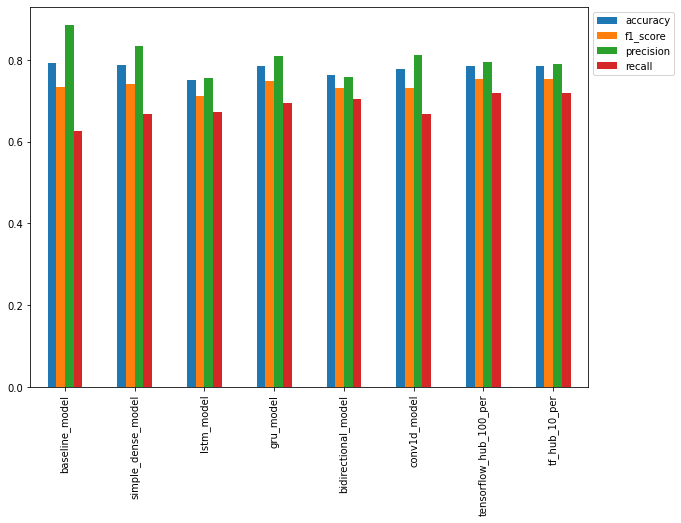

In [ ]:
import matplotlib.pyplot as plt 

performance_table.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0))

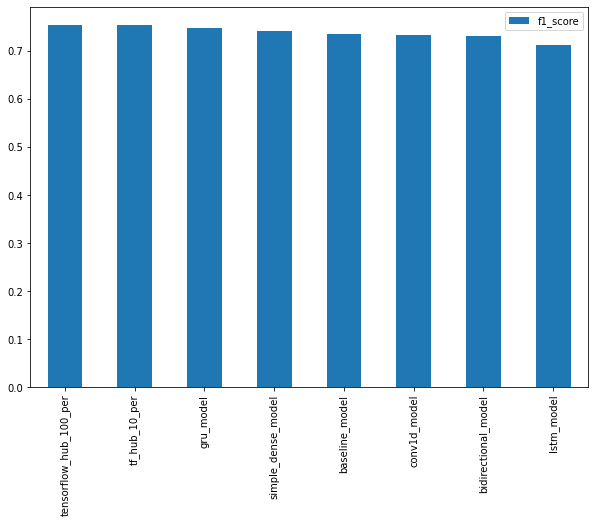

In [ ]:
performance_table.sort_values("f1_score", ascending=False)["f1_score"].plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0))

## Saving and loding a trained model 

There are two formats in which model can be saved:
* `HDF5` format
> Useful if you are planning to use your model outside of tensorflow ecosystem. You will have to tell tensorflow about the custom objects you have used (anything that is not made of pure tensorflow. e.g -> layer made from tensorfow_hub)
* `SaveModel` format 
> It not just stores the model file, it also stores metadata about the model as much as it can, so you don't have to specify if you use any custom object

### Saving model in **hdf5** format

In [ ]:
# save tf hub sentence encoder model (USE) as it is best performing deep model
model_6.save("model_6.h5")

In [ ]:
# load model with custom Hub layer (required with hdf5 layer)
loaded_hdf5_model = tf.keras.models.load_model(
    "model_6.h5",
    custom_objects = {"KerasLayer": hub.KerasLayer}
)

In [ ]:
# Evaluate with the loaded model 
loaded_hdf5_model.evaluate(val_sentences, val_labels)

24/24 [==============================] - 2s 21ms/step - loss: 0.4977 - accuracy: 0.7861


[0.49774235486984253, 0.7860892415046692]

In [ ]:
model_6_result

{'accuracy': 0.7860892388451444,
 'f1_score': 0.7541478129713424,
 'precision': 0.7936507936507936,
 'recall': 0.7183908045977011}

In [ ]:
model_6s_result

{'accuracy': 0.8149606299212598,
 'f1_score': 0.7840735068912711,
 'precision': 0.839344262295082,
 'recall': 0.735632183908046}

Calling the save method on the model without adding `.h5` extension, saves the model in `SaveModel` format

In [ ]:
model_6.save("model_6_save_model")

INFO:tensorflow:Assets written to: model_6_save_model/assets


INFO:tensorflow:Assets written to: model_6_save_model/assets


In [ ]:
# load TF Hub sentence encoder SaveModel
loded_save_model_6 = tf.keras.models.load_model("./model_6_save_model")
loded_save_model_6.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 20ms/step - loss: 0.4977 - accuracy: 0.7861


[0.49774235486984253, 0.7860892415046692]

## Finding the most wrong examples

* `0`: Not a disaster tweet
* `1`: Real disaster tweet

In [ ]:
type(val_sentences)

numpy.ndarray

In [ ]:
info_table = pd.DataFrame({
    "sentence": val_sentences,
    "target": val_labels,
    "preds": tf.cast(model_6s_preds, dtype=tf.int32),
    "pred_probs": tf.squeeze(model_6s_pred_probs)
})
info_table.head()

,sentence,target,preds,pred_probs
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0,0.148721
1,FedEx no longer to transport bioterror germs i...,0,1,0.745171
2,Gunmen kill four in El Salvador bus attack: Su...,1,1,0.987999
3,@camilacabello97 Internally and externally scr...,1,0,0.204881
4,Radiation emergency #preparedness starts with ...,1,1,0.734337


In [ ]:
most_wrong_table = info_table[info_table['preds'] != info_table['target']].sort_values('pred_probs', ascending=False)
most_wrong_table.head()

,sentence,target,preds,pred_probs
31,? High Skies - Burning Buildings ? http://t.co...,0,1,0.914421
759,FedEx will no longer transport bioterror patho...,0,1,0.862412
628,@noah_anyname That's where the concentration c...,0,1,0.846476
393,@SonofLiberty357 all illuminated by the bright...,0,1,0.834235
49,@madonnamking RSPCA site multiple 7 story high...,0,1,0.831017


In [ ]:
most_wrong_table.tail()

,sentence,target,preds,pred_probs
233,I get to smoke my shit in peace,1,0,0.041085
244,Reddit Will Now QuarantineÛ_ http://t.co/pkUA...,1,0,0.040338
411,@SoonerMagic_ I mean I'm a fan but I don't nee...,1,0,0.035451
38,Why are you deluged with low self-image? Take ...,1,0,0.035170
23,Ron &amp; Fez - Dave's High School Crush https...,1,0,0.033317


In [ ]:
false_positive_random_sentences = most_wrong_table[most_wrong_table.target == 0].sample(n=10)
# false_positive_random_sentences
for row in false_positive_random_sentences.itertuples():
  _, sentence, target, preds, pred_probs = row

  print(f"Sentence:\n{sentence}\n\n target:{target}\n pred:{preds}\n pred_prob: {pred_probs}\n _____\n")

Sentence:
[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES WITH MAGNE-TRACTION INSTRUCTIONS http://t.co/xEZBs3sq0y http://t.co/C2x0QoKGlY

 target:0
 pred:1
 pred_prob: 0.7838844060897827
 _____

Sentence:
Love is the weapon for this wounded generation &lt;3

 target:0
 pred:1
 pred_prob: 0.588915228843689
 _____

Sentence:
The #tubestrike is because TFL workers may have trouble planning downtime. I hope none need emergency services. http://t.co/iCSFDSiFqb

 target:0
 pred:1
 pred_prob: 0.7217691540718079
 _____

Sentence:
Crack in the path where I wiped out this morning during beach run. Surface wounds on left elbow and right knee. http://t.co/yaqRSximph

 target:0
 pred:1
 pred_prob: 0.6742261648178101
 _____

Sentence:
Deaths 3 http://t.co/nApviyGKYK

 target:0
 pred:1
 pred_prob: 0.7509435415267944
 _____

Sentence:
He made such a good point. White person comings mass murder labelled as criminal minority does the same thing... http://t.co/37qPsSnaCv

 target:0
 pred:1
 pred_prob: 0.546

In [ ]:
false_negative_random_sentences = most_wrong_table[most_wrong_table.target == 1].sample(n=10)
# false_negative_random_sentences
for row in false_negative_random_sentences.itertuples():
  _, sentence, target, preds, pred_probs = row

  print(f"Sentence:\n{sentence}\n\n target:{target}\n pred:{preds}\n pred_prob: {pred_probs}\n -----\n")

Sentence:
Leitchfield KY:

 Bella Edward &amp; Rosalie need rescue/adoption/local foster home(s)/sponsorships.

 Trapped &amp;... http://t.co/Ajay0sNPlg

 target:1
 pred:0
 pred_prob: 0.11756080389022827
 -----

Sentence:
A Dayton-area org tells me it was hit by a cyber attack: http://t.co/7LhKJz0IVO

 target:1
 pred:0
 pred_prob: 0.4391125440597534
 -----

Sentence:
@BoyInAHorsemask its a panda trapped in a dogs body

 target:1
 pred:0
 pred_prob: 0.05481022596359253
 -----

Sentence:
I get to smoke my shit in peace

 target:1
 pred:0
 pred_prob: 0.04108479619026184
 -----

Sentence:
Policyholders object to Clico rescue plan http://t.co/E4DvI9vUXZ http://t.co/JyCpf8iYhg

 target:1
 pred:0
 pred_prob: 0.3628242015838623
 -----

Sentence:
There's a weird siren going off here...I hope Hunterston isn't in the process of blowing itself to smithereens...

 target:1
 pred:0
 pred_prob: 0.38130682706832886
 -----

Sentence:
'The way you move is like a full on rainstorm and I'm a house of card

## Making prediction on the test dataset

In [ ]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
test_df.text.shape

(3263,)

In [ ]:
test_pred_probs = model_6s.predict(test_df["text"])
test_pred_probs[:10], test_pred_probs.shape

(array([[0.5667657 ],
        [0.8826063 ],
        [0.8329226 ],
        [0.925434  ],
        [0.9483595 ],
        [0.6053988 ],
        [0.06506857],
        [0.04728284],
        [0.04950264],
        [0.05612907]], dtype=float32), (3263, 1))

In [ ]:
test_preds = tf.squeeze(tf.cast(tf.round(test_pred_probs), dtype=tf.int32))
test_preds[:10]

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0], dtype=int32)>

In [ ]:
test_pred_table = pd.DataFrame({"text": test_df["text"], "pred": test_preds})
test_pred_table

,text,pred
0,Just happened a terrible car crash,1
1,"Heard about #earthquake is different cities, s...",1
2,"there is a forest fire at spot pond, geese are...",1
3,Apocalypse lighting. #Spokane #wildfires,1
4,Typhoon Soudelor kills 28 in China and Taiwan,1
...,...,...
3258,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,1
3259,Storm in RI worse than last hurricane. My city...,1
3260,Green Line derailment in Chicago http://t.co/U...,1
3261,MEG issues Hazardous Weather Outlook (HWO) htt...,1


In [ ]:
# see random test predictions where it is predicted as disaster
disaster = test_pred_table.sample(n=10)
for row in disaster.itertuples():
  _, text, pred = row
  print(f"Text\n\n{text}\n Prediction: {'Disaster' if pred == 1 else 'Not a disaster'}\n\n-----")

Text

Drowning doesn't sound half bad rn
 Prediction: Not a disaster

-----
Text

@MilesWithTate but seeing the writers obliterate their characters will piss me off. So it's bad either way
 Prediction: Not a disaster

-----
Text

Udhampur terror attack: NIA takes over probe Pakistani terrorist quizzed; Pak denies link  http://t.co/i3gLzABeGl
 Prediction: Disaster

-----
Text

Gold Coast tram evacuated due to broken powerlines http://t.co/hJqbA42iY9 #Local NewsbrokenEmergency ServicesGold CoastpowerlineTramTr
 Prediction: Disaster

-----
Text

@edsheeran tf is innit
 Prediction: Not a disaster

-----
Text

ll//ll= Pic of 16yr old PKK suicide bomber who detonated bomb in Turkey Army trench released http://t.co/8vBgg9IY7i /
 Prediction: Disaster

-----
Text

Thieves crash dealership gate steal four vehicles in Killeen http://t.co/aA47AXC6sr http://t.co/fz5axahPVr
 Prediction: Not a disaster

-----
Text

was that thunder?
 Prediction: Not a disaster

-----
Text

Tornado warnings issued for

In [ ]:
wild_tweet = "Today okicho has faced biggest earthqueak in the history of disaster more then 900 people missing"

model_6.predict([wild_tweet])

array([[0.7010403]], dtype=float32)

In [ ]:
model_0.predict([wild_tweet])

array([1])